In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [28]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [29]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [30]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [31]:
df.duplicated().sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [33]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [42]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100
    
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]
    
    lower_limit_1 = norm.ppf((1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
    upper_limit_1 = norm.ppf(ci+(1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
       
    lower_limit_2 = norm.ppf((1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)
    upper_limit_2 = norm.ppf(ci + (1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n) 
    
    sns.kdeplot(data = sample1_n, color="#467821", fill = True, linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#e5ae38', fill = True, linewidth = 2)
    
    return None

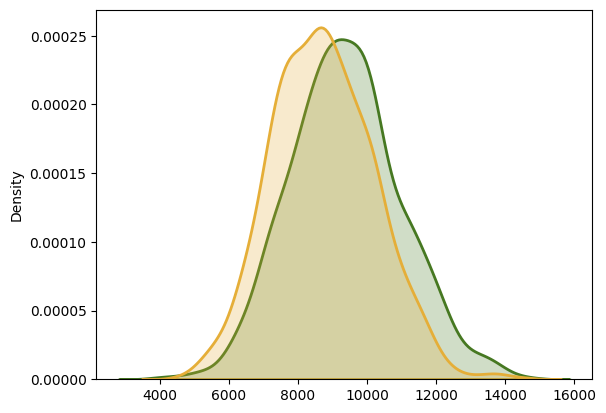

In [43]:
bootstrap(df_male['Purchase'],df_female['Purchase'],10)

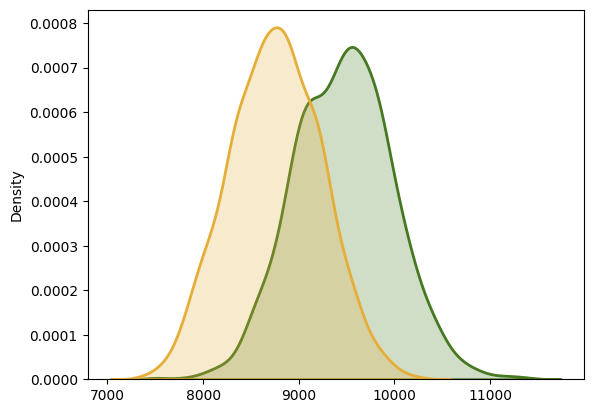

In [44]:
bootstrap(df_male['Purchase'],df_female['Purchase'],100)

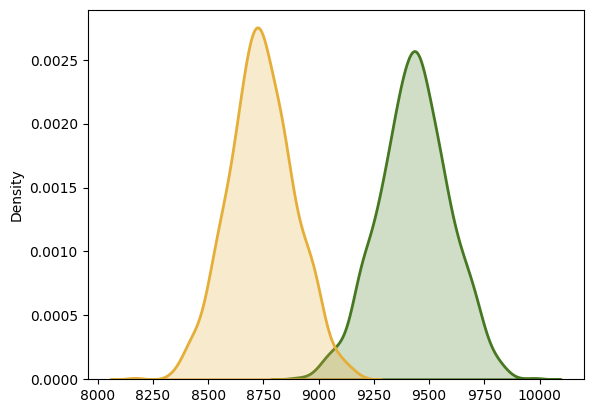

In [45]:
bootstrap(df_male['Purchase'],df_female['Purchase'],1000)

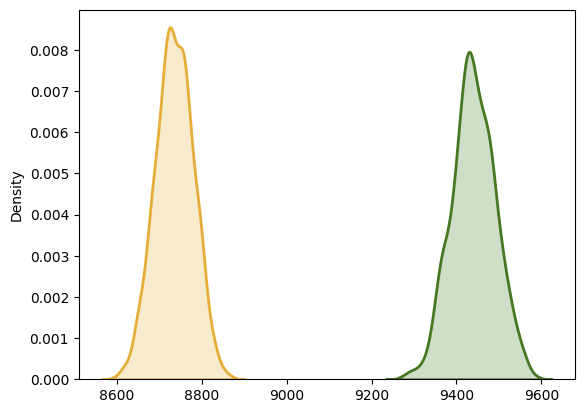

In [46]:
bootstrap(df_male['Purchase'],df_female['Purchase'],10000)

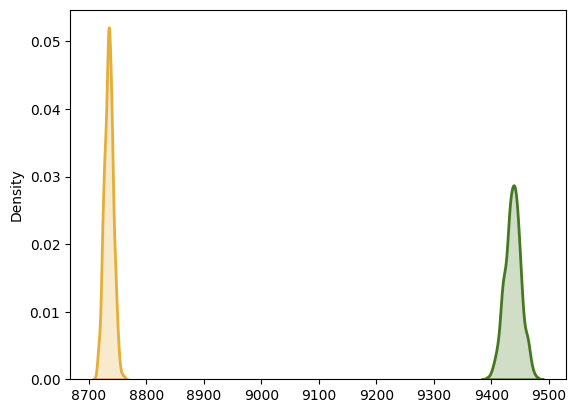

In [47]:
bootstrap(df_male['Purchase'],df_female['Purchase'],100000)